In [1]:
import numpy as np
import random
import pandas as pd
import math

In [35]:
# GRID

#[0, 0, 0, GOAL]
#[0, X, 0, Lose]
#[0, 0, 0, 0   ]

In [2]:
class Grid():
    def __init__(self):
        self.grid = np.array([[0,0,0,0],[0,1,0,0],[0,0,0,0]])
        self.update_grid = self.grid.copy()
        self.dest_posi = (0,3)
        self.neg_posi = (1,3)
        self.start_posi = (2,0)
        self.block_posi = (1,1)
        self.agent = 8
        
    def update(self):
        self.update_grid = self.grid.copy()
        
    
    def print_grid(self,agent_posi):
        self.update_grid[agent_posi[0],agent_posi[1]] = self.agent
        print(self.update_grid)
        self.update()
        
        

In [5]:
class Agent():
    def __init__(self, start_posi):
        self.start_posi = start_posi
        self.posi = self.start_posi
        self.new_posi = self.start_posi
    
    def choose_action(self, q_table):
        state_actions = q_table.iloc[transform_state_to_Q_table_state(self.posi), :]
        if np.random.uniform() > EPSILON: #or ((state_actions == 0).all()):  # act non-greedy or state-action have no value
            action_name = np.random.randint(0,3)
        else:   # act greedy
            action_name = state_actions.idxmax()    # replace argmax to idxmax as argmax means a different function in newer version of pandas
        #print("Action_choosen: "+str(action_name))
        return action_name
    
        
    def action(self, q_table):
        # up = 0, left = 1, right = 2, down = 3
        #action = random.randint(0,3)
        action = self.choose_action(q_table)
        #print(action)
        #stocastic_move = random.random()
        self.posi = self.new_posi
                            # Block edges          block middle stone
        if action == 0 and self.posi[0] != 0 and self.posi != [2,1]:
            self.posi[0] = self.posi[0]-1
            
        elif action == 1 and self.posi[1] !=0 and self.posi != [1,2]:
            self.posi[1] = self.posi[1]-1
        
        elif action == 2 and self.posi[1] != 3 and self.posi != [1,0]:
            self.posi[1] = self.posi[1]+1
        
        elif action == 3 and self.posi[0] != 2 and self.posi != [0,1]:
            self.posi[0] = self.posi[0]+1
        
        else:
            pass

        return action
        
        
    def give_posi(self):
        a = self.posi.copy()
        return a
    

In [4]:
start_posi = [2,0]
agent = Agent(start_posi)
grid = Grid()
grid.print_grid(agent.give_posi())

[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]


In [6]:
def make_Q_table(actions,n_states):
    table = pd.DataFrame(
        np.zeros((n_states, actions)), columns = list(range(actions)))     # q_table initial values
    return table

def transform_state_to_Q_table_state(S):
    if S == [0,0]:
        return 0
    elif S == [0,1]:
        return 1
    elif S == [0,2]:
        return 2
    elif S == [0,3]:
        return 3
    elif S == [1,0]:
        return 4
    elif S == [1,1]:
        return 5
    elif S == [1,2]:
        return 6
    elif S == [1,3]:
        return 7
    elif S == [2,0]:
        return 8
    elif S == [2,1]:
        return 9
    elif S == [2,2]:
        return 10
    elif S == [2,3]:
        return 11
    
def retransform(Q_state):
    if Q_state == 0:
        return [0,0]
    elif Q_state == 1:
        return [0,1]
    elif Q_state == 2:
        return [0,2]
    elif Q_state == 3:
        return [0,3]
    elif Q_state == 4:
        return [1,0]
    elif Q_state == 5:
        return [1,1]
    elif Q_state == 6:
        return [1,2]
    elif Q_state == 7:
        return [1,3]
    elif Q_state == 8:
        return [2,0]
    elif Q_state == 9:
        return [2,1]
    elif Q_state == 10:
        return [2,2]
    elif Q_state == 11:
        return [2,3]
    else:
        print("ERROR!")

In [20]:
def calc_divider(EPOCHS,steps, EPSILON, EPSILON_FINAL):
    return (EPOCHS*steps)/(math.sqrt(EPSILON_FINAL-EPSILON))

def update_epsilon(div,EPSILON):
    EPSILON += ((EPOCHS*steps)/div)**2

def build_policy_table(q_table):
    indx = []
    for i in range(len(q_table)):
        #print(q_table.loc[i,:].idxmax())
        indx.append(q_table.loc[i,:].idxmax())
        

    policy = np.reshape(indx, (3,4))
    #print(policy)
    policy_arrow = np.array([["0","0","0","0"],["0","0","0","0"],["0","0","0","0"]])
    for i in range(3):
        for j in range(4):
            a = policy[i,j]           
            if a == 0:
                policy_arrow[i,j] = "^"
            elif a == 1:
                policy_arrow[i,j] = "<"
            elif a == 2:
                policy_arrow[i,j] = ">"
            else:
                policy_arrow[i,j] = "v"

    policy_arrow[1,1] = "0"
    return policy_arrow

In [31]:
EPSILON = 0.1
EPSILON_FINAL = 0.95
GAMMA = 0.9 #Discount
ALPHA = 0.01 #learning Rate
q_table = make_Q_table(4,12)
EPOCHS = 85
steps = 500
COST_PER_STEP = -0.03


Reward_list = []

for ep in range(EPOCHS):
    rewards = 0
    start_posi = [2,0]
    agent = Agent(start_posi)
    grid = Grid()
    print("Game Starts!\nStart Position:")
    grid.print_grid(agent.give_posi())
    for step in range(steps):
        states = []
        print("-------------------------------")
        S = agent.give_posi()
        
        print(S)
        A = agent.action(q_table)
        #print(agent.give_posi())
        print("S: ",S)
        S_ = agent.give_posi()
        print(S_)
        grid.print_grid(agent.give_posi())
        #update_epsilon(div,EPSILON)


        # Check for Win/Lose
        if S_ == [0,3]:
            print("WIN!")
            R = +1
            Reward_list.append(R)
            print("REWARD: {} -- EPSILON: {} -- Action: {} --".format(R, EPSILON, A))
            q_old = q_table.loc[transform_state_to_Q_table_state(S), A]  #Current Q-Value of the state
            print("S: ",S)
            print("Q(s,a): ", q_old)
            q_learned = R + GAMMA * q_table.loc[transform_state_to_Q_table_state(S_), :].max()
            print("R+y*maxQ(s`,a): ", q_learned)
            print("S_: ",S_)
            q_table.loc[transform_state_to_Q_table_state(S), A] += ALPHA * (q_learned - q_old)  # update
            Q_new = q_old + ALPHA * (q_learned - q_old)
            print("Q_new: ", Q_new)
            rewards += R

            break
        elif S_ == [1,3]:
            print("You lost!")
            R = -1
            Reward_list.append(R)
            print("REWARD: {} -- EPSILON: {} -- Action: {} --".format(R, EPSILON, A))
            q_old = q_table.loc[transform_state_to_Q_table_state(S), A]  #Current Q-Value of the state
            print("S: ",S)
            print("Q(s,a): ", q_old)
            q_learned = R + GAMMA * q_table.loc[transform_state_to_Q_table_state(S_), :].max()
            print("R+y*maxQ(s`,a): ", q_learned)
            print("S_: ",S_)
            q_table.loc[transform_state_to_Q_table_state(S), A] += ALPHA * (q_learned - q_old)  # update
            Q_new = q_old + ALPHA * (q_learned - q_old)
            print("Q_new: ", Q_new)
            rewards += R

            break
        else:
            #cost per step
            R = COST_PER_STEP
            rewards += R
            pass
        Reward_list.append(rewards)
        print("REWARD: {} -- EPSILON: {} -- Action: {} --".format(R, EPSILON, A))
        q_old = q_table.loc[transform_state_to_Q_table_state(S), A]  #Current Q-Value of the state
        print("S: ",S)
        print("Q(s,a): ", q_old)
        q_learned = R + GAMMA * q_table.loc[transform_state_to_Q_table_state(S_), :].max()
        print("R+y*maxQ(s`,a): ", q_learned)
        print("S_: ",S_)
        q_table.loc[transform_state_to_Q_table_state(S), A] += ALPHA * (q_learned - q_old)  # update
        Q_new = q_old + ALPHA * (q_learned - q_old)
        print("Q_new: ", Q_new)

    if EPSILON <= EPSILON_FINAL:
        EPSILON += 0.01

Game Starts!
Start Position:
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
-------------------------------
[2, 0]
S:  [2, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.1 -- Action: 0 --
S:  [2, 0]
Q(s,a):  0.0
R+y*maxQ(s`,a):  -0.03
S_:  [1, 0]
Q_new:  -0.0003
-------------------------------
[1, 0]
S:  [1, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.1 -- Action: 0 --
S:  [1, 0]
Q(s,a):  0.0
R+y*maxQ(s`,a):  -0.03
S_:  [0, 0]
Q_new:  -0.0003
-------------------------------
[0, 0]
S:  [0, 0]
[0, 1]
[[0 8 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.1 -- Action: 2 --
S:  [0, 0]
Q(s,a):  0.0
R+y*maxQ(s`,a):  -0.03
S_:  [0, 1]
Q_new:  -0.0003
-------------------------------
[0, 1]
S:  [0, 1]
[0, 1]
[[0 8 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.1 -- Action: 0 --
S:  [0, 1]
Q(s,a):  0.0
R+y*maxQ(s`,a):  -0.03
S_:  [0, 1]
Q_new:  -0.0003
-------------------------------
[0, 1]
S:  [0, 1]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]

Q_new:  -0.0005969999999999999
-------------------------------
[0, 0]
S:  [0, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.12 -- Action: 1 --
S:  [0, 0]
Q(s,a):  -0.0005969999999999999
R+y*maxQ(s`,a):  -0.03
S_:  [0, 0]
Q_new:  -0.0008910299999999999
-------------------------------
[0, 0]
S:  [0, 0]
[0, 1]
[[0 8 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.12 -- Action: 2 --
S:  [0, 0]
Q(s,a):  -0.0011848197
R+y*maxQ(s`,a):  -0.0304563
S_:  [0, 1]
Q_new:  -0.001477534503
-------------------------------
[0, 1]
S:  [0, 1]
[0, 2]
[[0 0 8 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.12 -- Action: 2 --
S:  [0, 1]
Q(s,a):  -0.000507
R+y*maxQ(s`,a):  -0.012089999999999997
S_:  [0, 2]
Q_new:  -0.0006228299999999999
-------------------------------
[0, 2]
S:  [0, 2]
[0, 2]
[[0 0 8 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.12 -- Action: 0 --
S:  [0, 2]
Q(s,a):  -0.0008910299999999999
R+y*maxQ(s`,a):  -0.012089999999999997
S_:  [0, 2]
Q_ne

S:  [1, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.14 -- Action: 3 --
S:  [1, 0]
Q(s,a):  -0.0008990492700000001
R+y*maxQ(s`,a):  -0.03027
S_:  [2, 0]
Q_new:  -0.0011927587773000001
-------------------------------
[2, 0]
S:  [2, 0]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.14 -- Action: 2 --
S:  [2, 0]
Q(s,a):  -0.0020434125627902997
R+y*maxQ(s`,a):  -0.0305373
S_:  [2, 1]
Q_new:  -0.0023283514371623968
-------------------------------
[2, 1]
S:  [2, 1]
[2, 2]
[[0 0 0 0]
 [0 1 0 0]
 [0 0 8 0]]
REWARD: -0.03 -- EPSILON: 0.14 -- Action: 2 --
S:  [2, 1]
Q(s,a):  -0.0005969999999999999
R+y*maxQ(s`,a):  -0.03
S_:  [2, 2]
Q_new:  -0.0008910299999999999
-------------------------------
[2, 2]
S:  [2, 2]
[1, 2]
[[0 0 0 0]
 [0 1 8 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.14 -- Action: 0 --
S:  [2, 2]
Q(s,a):  -0.0003
R+y*maxQ(s`,a):  -0.03
S_:  [1, 2]
Q_new:  -0.0005969999999999999
-------------------------------
[1, 2]
S:  [1, 2]
[1, 3]
[

 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.16000000000000003 -- Action: 1 --
S:  [2, 0]
Q(s,a):  -0.0026102829351525034
R+y*maxQ(s`,a):  -0.03027
S_:  [2, 0]
Q_new:  -0.0028868801058009783
-------------------------------
[2, 0]
S:  [2, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.16000000000000003 -- Action: 0 --
S:  [2, 0]
Q(s,a):  -0.0023468825827295398
R+y*maxQ(s`,a):  -0.031073482899569998
S_:  [1, 0]
Q_new:  -0.0026341485858979445
-------------------------------
[1, 0]
S:  [1, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.16000000000000003 -- Action: 2 --
S:  [1, 0]
Q(s,a):  -0.0017795585962614
R+y*maxQ(s`,a):  -0.031073482899569998
S_:  [1, 0]
Q_new:  -0.002072497839294486
-------------------------------
[1, 0]
S:  [1, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.16000000000000003 -- Action: 3 --
S:  [1, 0]
Q(s,a):  -0.0011927587773000001
R+y*maxQ(s`,a):  -0.03027
S_:  [2, 0]
Q_new:  -0.00148353118952700

[0, 1]
S:  [0, 1]
[0, 2]
[[0 0 8 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.16000000000000003 -- Action: 2 --
S:  [0, 1]
Q(s,a):  -0.0005148960190203345
R+y*maxQ(s`,a):  0.01410895509
S_:  [0, 2]
Q_new:  -0.00036865750793013116
-------------------------------
[0, 2]
S:  [0, 2]
[0, 1]
[[0 8 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.16000000000000003 -- Action: 1 --
S:  [0, 2]
Q(s,a):  -0.001493956935050166
R+y*maxQ(s`,a):  -0.030331791757137117
S_:  [0, 1]
Q_new:  -0.0017823352832710354
-------------------------------
[0, 1]
S:  [0, 1]
[0, 2]
[[0 0 8 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.16000000000000003 -- Action: 2 --
S:  [0, 1]
Q(s,a):  -0.00036865750793013116
R+y*maxQ(s`,a):  0.01410895509
S_:  [0, 2]
Q_new:  -0.00022388138195082984
-------------------------------
[0, 2]
S:  [0, 2]
[0, 2]
[[0 0 8 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.16000000000000003 -- Action: 0 --
S:  [0, 2]
Q(s,a):  -0.0012236506079699998
R+y*maxQ(s`,a): 

S_:  [2, 2]
Q_new:  -0.002317659167162397
-------------------------------
[2, 2]
S:  [2, 2]
[2, 3]
[[0 0 0 0]
 [0 1 0 0]
 [0 0 0 8]]
REWARD: -0.03 -- EPSILON: 0.19000000000000006 -- Action: 2 --
S:  [2, 2]
Q(s,a):  -0.0003
R+y*maxQ(s`,a):  -0.03
S_:  [2, 3]
Q_new:  -0.0005969999999999999
-------------------------------
[2, 3]
S:  [2, 3]
[2, 3]
[[0 0 0 0]
 [0 1 0 0]
 [0 0 0 8]]
REWARD: -0.03 -- EPSILON: 0.19000000000000006 -- Action: 2 --
S:  [2, 3]
Q(s,a):  -0.0003
R+y*maxQ(s`,a):  -0.03
S_:  [2, 3]
Q_new:  -0.0005969999999999999
-------------------------------
[2, 3]
S:  [2, 3]
[1, 3]
[[0 0 0 0]
 [0 1 0 8]
 [0 0 0 0]]
You lost!
REWARD: -1 -- EPSILON: 0.19000000000000006 -- Action: 0 --
S:  [2, 3]
Q(s,a):  -0.01
R+y*maxQ(s`,a):  -1.0
S_:  [1, 3]
Q_new:  -0.0199
Game Starts!
Start Position:
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
-------------------------------
[2, 0]
S:  [2, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.20000000000000007 -- Action: 1 --
S:  [2, 0]
Q

 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.21000000000000008 -- Action: 3 --
S:  [1, 0]
Q(s,a):  -0.0034681731033484415
R+y*maxQ(s`,a):  -0.03161595539595162
S_:  [2, 0]
Q_new:  -0.003749650926274473
-------------------------------
[2, 0]
S:  [2, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.21000000000000008 -- Action: 3 --
S:  [2, 0]
Q(s,a):  -0.0017955059955017997
R+y*maxQ(s`,a):  -0.03161595539595162
S_:  [2, 0]
Q_new:  -0.002093710489506298
-------------------------------
[2, 0]
S:  [2, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.21000000000000008 -- Action: 1 --
S:  [2, 0]
Q(s,a):  -0.005330782525825742
R+y*maxQ(s`,a):  -0.031884339440555666
S_:  [2, 0]
Q_new:  -0.005596318094973042
-------------------------------
[2, 0]
S:  [2, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.21000000000000008 -- Action: 3 --
S:  [2, 0]
Q(s,a):  -0.002093710489506298
R+y*maxQ(s`,a):  -0.031884339440555666
S_:  [2, 0]
Q_new

[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.2300000000000001 -- Action: 1 --
S:  [1, 0]
Q(s,a):  -0.005484398378611735
R+y*maxQ(s`,a):  -0.03337468583364703
S_:  [1, 0]
Q_new:  -0.005763301253162089
-------------------------------
[1, 0]
S:  [1, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.2300000000000001 -- Action: 2 --
S:  [1, 0]
Q(s,a):  -0.006032481342618663
R+y*maxQ(s`,a):  -0.03337468583364703
S_:  [1, 0]
Q_new:  -0.006305903387528946
-------------------------------
[1, 0]
S:  [1, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.2300000000000001 -- Action: 2 --
S:  [1, 0]
Q(s,a):  -0.006305903387528946
R+y*maxQ(s`,a):  -0.03337468583364703
S_:  [1, 0]
Q_new:  -0.006576591211990127
-------------------------------
[1, 0]
S:  [1, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.2300000000000001 -- Action: 0 --
S:  [1, 0]
Q(s,a):  -0.00574481286442471
R+y*maxQ(s`,a):  -0.033557405074991

[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.2400000000000001 -- Action: 1 --
S:  [1, 0]
Q(s,a):  -0.006312767806313739
R+y*maxQ(s`,a):  -0.03363031107122059
S_:  [1, 0]
Q_new:  -0.006585943238962807
-------------------------------
[1, 0]
S:  [1, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.2400000000000001 -- Action: 0 --
S:  [1, 0]
Q(s,a):  -0.0063009314306325176
R+y*maxQ(s`,a):  -0.03408435333727972
S_:  [0, 0]
Q_new:  -0.006578765649698989
-------------------------------
[0, 0]
S:  [0, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.2400000000000001 -- Action: 0 --
S:  [0, 0]
Q(s,a):  -0.007328920341055164
R+y*maxQ(s`,a):  -0.03408435333727972
S_:  [0, 0]
Q_new:  -0.00759647467101741
-------------------------------
[0, 0]
S:  [0, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.2400000000000001 -- Action: 3 --
S:  [0, 0]
Q(s,a):  -0.00453817037475525
R+y*maxQ(s`,a):  -0.033630311071220

Q_new:  -0.002986535937075537
-------------------------------
[2, 0]
S:  [2, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.27000000000000013 -- Action: 0 --
S:  [2, 0]
Q(s,a):  -0.0073912258091838245
R+y*maxQ(s`,a):  -0.034389111070094604
S_:  [1, 0]
Q_new:  -0.0076612046617929325
-------------------------------
[1, 0]
S:  [1, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.27000000000000013 -- Action: 0 --
S:  [1, 0]
Q(s,a):  -0.007675504779410338
R+y*maxQ(s`,a):  -0.034866588080893525
S_:  [0, 0]
Q_new:  -0.00794741561242517
-------------------------------
[0, 0]
S:  [0, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.27000000000000013 -- Action: 1 --
S:  [0, 0]
Q(s,a):  -0.007697908327148194
R+y*maxQ(s`,a):  -0.034866588080893525
S_:  [0, 0]
Q_new:  -0.007969595124685647
-------------------------------
[0, 0]
S:  [0, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.27000000000000013 -- A

S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.29000000000000015 -- Action: 3 --
S:  [2, 1]
Q(s,a):  -0.002093710489506298
R+y*maxQ(s`,a):  -0.031884339440555666
S_:  [2, 1]
Q_new:  -0.0023916167790167917
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.29000000000000015 -- Action: 0 --
S:  [2, 1]
Q(s,a):  -0.0023649689977756506
R+y*maxQ(s`,a):  -0.03212847209799809
S_:  [2, 1]
Q_new:  -0.002662604028777875
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.29000000000000015 -- Action: 0 --
S:  [2, 1]
Q(s,a):  -0.002662604028777875
R+y*maxQ(s`,a):  -0.03215245510111511
S_:  [2, 1]
Q_new:  -0.0029575025395012474
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.29000000000000015 -- Action: 3 --
S:  [2, 1]
Q(s,a):  -0.0023916167790167917
R+y*maxQ(s`,a)

REWARD: -0.03 -- EPSILON: 0.3200000000000002 -- Action: 0 --
S:  [1, 0]
Q(s,a):  -0.009565609027423184
R+y*maxQ(s`,a):  -0.036156587766000434
S_:  [0, 0]
Q_new:  -0.009831518814808957
-------------------------------
[0, 0]
S:  [0, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.3200000000000002 -- Action: 1 --
S:  [0, 0]
Q(s,a):  -0.007969595124685647
R+y*maxQ(s`,a):  -0.036156587766000434
S_:  [0, 0]
Q_new:  -0.008251465051098795
-------------------------------
[0, 0]
S:  [0, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.3200000000000002 -- Action: 3 --
S:  [0, 0]
Q(s,a):  -0.00684065307333382
R+y*maxQ(s`,a):  -0.03517069329263964
S_:  [1, 0]
Q_new:  -0.007123953475526879
-------------------------------
[1, 0]
S:  [1, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.3200000000000002 -- Action: 1 --
S:  [1, 0]
Q(s,a):  -0.007671897157184382
R+y*maxQ(s`,a):  -0.03517069329263964
S_:  [1, 0]
Q_new:  -0.0079468851185

Q_new:  -0.009787573022745112
-------------------------------
[1, 0]
S:  [1, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.3300000000000002 -- Action: 0 --
S:  [1, 0]
Q(s,a):  -0.010096226279258956
R+y*maxQ(s`,a):  -0.036472944077638604
S_:  [0, 0]
Q_new:  -0.010359993457242752
-------------------------------
[0, 0]
S:  [0, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.3300000000000002 -- Action: 0 --
S:  [0, 0]
Q(s,a):  -0.0097340442517787
R+y*maxQ(s`,a):  -0.036472944077638604
S_:  [0, 0]
Q_new:  -0.010001433250037299
-------------------------------
[0, 0]
S:  [0, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.3300000000000002 -- Action: 0 --
S:  [0, 0]
Q(s,a):  -0.010001433250037299
R+y*maxQ(s`,a):  -0.036472944077638604
S_:  [0, 0]
Q_new:  -0.010266148358313312
-------------------------------
[0, 0]
S:  [0, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.3300000000000002 -- Action: 

Q_new:  -0.0057441439664341265
-------------------------------
[2, 0]
S:  [2, 0]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.3500000000000002 -- Action: 2 --
S:  [2, 0]
Q(s,a):  -0.008666757522149347
R+y*maxQ(s`,a):  -0.03375552801026973
S_:  [2, 1]
Q_new:  -0.00891764522703055
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.3500000000000002 -- Action: 0 --
S:  [2, 1]
Q(s,a):  -0.005871959128441465
R+y*maxQ(s`,a):  -0.03375552801026973
S_:  [2, 1]
Q_new:  -0.006150794817259748
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.3500000000000002 -- Action: 3 --
S:  [2, 1]
Q(s,a):  -0.0041728089002997
R+y*maxQ(s`,a):  -0.03375552801026973
S_:  [2, 1]
Q_new:  -0.004468636091399401
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.3500000000000002 -- Action: 3 -

Q(s,a):  -0.01
R+y*maxQ(s`,a):  -1.0
S_:  [1, 3]
Q_new:  -0.0199
Game Starts!
Start Position:
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
-------------------------------
[2, 0]
S:  [2, 0]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.3700000000000002 -- Action: 2 --
S:  [2, 0]
Q(s,a):  -0.009430452465268493
R+y*maxQ(s`,a):  -0.03481890949610836
S_:  [2, 1]
Q_new:  -0.009684337035576892
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.3700000000000002 -- Action: 0 --
S:  [2, 1]
Q(s,a):  -0.006150794817259748
R+y*maxQ(s`,a):  -0.03481890949610836
S_:  [2, 1]
Q_new:  -0.006437475964048234
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.3700000000000002 -- Action: 3 --
S:  [2, 1]
Q(s,a):  -0.00535434388456484
R+y*maxQ(s`,a):  -0.03481890949610836
S_:  [2, 1]
Q_new:  -0.005648989540680275
-------------------------------
[2, 1]
S:  [2, 1]
[

R+y*maxQ(s`,a):  -0.03955181199691418
S_:  [2, 0]
Q_new:  -0.00798087217286971
-------------------------------
[2, 0]
S:  [2, 0]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.40000000000000024 -- Action: 2 --
S:  [2, 0]
Q(s,a):  -0.011212465879165055
R+y*maxQ(s`,a):  -0.036406023622419834
S_:  [2, 1]
Q_new:  -0.011464401456597603
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.40000000000000024 -- Action: 3 --
S:  [2, 1]
Q(s,a):  -0.007117804024910924
R+y*maxQ(s`,a):  -0.036406023622419834
S_:  [2, 1]
Q_new:  -0.007410686220886013
-------------------------------
[2, 1]
S:  [2, 1]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.40000000000000024 -- Action: 1 --
S:  [2, 1]
Q(s,a):  -0.00798087217286971
R+y*maxQ(s`,a):  -0.03955181199691418
S_:  [2, 0]
Q_new:  -0.008296581571110155
-------------------------------
[2, 0]
S:  [2, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWA

[2, 0]
S:  [2, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.42000000000000026 -- Action: 3 --
S:  [2, 0]
Q(s,a):  -0.01090251131657474
R+y*maxQ(s`,a):  -0.039812260184917264
S_:  [2, 0]
Q_new:  -0.011191608805258166
-------------------------------
[2, 0]
S:  [2, 0]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.42000000000000026 -- Action: 2 --
S:  [2, 0]
Q(s,a):  -0.012711164564196173
R+y*maxQ(s`,a):  -0.03798363883896685
S_:  [2, 1]
Q_new:  -0.01296388930694388
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.42000000000000026 -- Action: 3 --
S:  [2, 1]
Q(s,a):  -0.008870709821074275
R+y*maxQ(s`,a):  -0.03798363883896685
S_:  [2, 1]
Q_new:  -0.0091618391112532
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.42000000000000026 -- Action: 0 --
S:  [2, 1]
Q(s,a):  -0.009061058714544712
R+y*maxQ(s`,a):

[[0 0 8 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.4500000000000003 -- Action: 2 --
S:  [0, 1]
Q(s,a):  0.013410453871785707
R+y*maxQ(s`,a):  0.15574714472071002
S_:  [0, 2]
Q_new:  0.01483382078027495
-------------------------------
[0, 2]
S:  [0, 2]
[0, 2]
[[0 0 8 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.4500000000000003 -- Action: 0 --
S:  [0, 2]
Q(s,a):  0.0069956178340303595
R+y*maxQ(s`,a):  0.15574714472071002
S_:  [0, 2]
Q_new:  0.008483133102897156
-------------------------------
[0, 2]
S:  [0, 2]
[0, 2]
[[0 0 8 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.4500000000000003 -- Action: 0 --
S:  [0, 2]
Q(s,a):  0.008483133102897156
R+y*maxQ(s`,a):  0.15574714472071002
S_:  [0, 2]
Q_new:  0.009955773219075285
-------------------------------
[0, 2]
S:  [0, 2]
[0, 2]
[[0 0 8 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.4500000000000003 -- Action: 0 --
S:  [0, 2]
Q(s,a):  0.009955773219075285
R+y*maxQ(s`,a):  0.15574714472071002
S_:  [0, 2]
Q_

REWARD: -0.03 -- EPSILON: 0.4900000000000003 -- Action: 1 --
S:  [2, 0]
Q(s,a):  -0.018167604028841874
R+y*maxQ(s`,a):  -0.0432228564806491
S_:  [2, 0]
Q_new:  -0.018418156553359946
-------------------------------
[2, 0]
S:  [2, 0]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.4900000000000003 -- Action: 2 --
S:  [2, 0]
Q(s,a):  -0.014693576975166347
R+y*maxQ(s`,a):  -0.039007636109126415
S_:  [2, 1]
Q_new:  -0.014936717566505947
-------------------------------
[2, 1]
S:  [2, 1]
[2, 2]
[[0 0 0 0]
 [0 1 0 0]
 [0 0 8 0]]
REWARD: -0.03 -- EPSILON: 0.4900000000000003 -- Action: 2 --
S:  [2, 1]
Q(s,a):  -0.01000848456569602
R+y*maxQ(s`,a):  -0.032955194461024614
S_:  [2, 2]
Q_new:  -0.010237951664649305
-------------------------------
[2, 2]
S:  [2, 2]
[1, 2]
[[0 0 0 0]
 [0 1 8 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.4900000000000003 -- Action: 0 --
S:  [2, 2]
Q(s,a):  -0.003320158379486706
R+y*maxQ(s`,a):  -0.019814968727262856
S_:  [1, 2]
Q_new:  -0.0034851064829

S:  [0, 0]
Q(s,a):  -0.008275547088380448
R+y*maxQ(s`,a):  -0.011764918750983212
S_:  [0, 1]
Q_new:  -0.008310440805006475
-------------------------------
[0, 1]
S:  [0, 1]
[0, 2]
[[0 0 8 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.5300000000000004 -- Action: 2 --
S:  [0, 1]
Q(s,a):  0.02026120138779643
R+y*maxQ(s`,a):  0.21092696731104213
S_:  [0, 2]
Q_new:  0.022167859047028886
-------------------------------
[0, 2]
S:  [0, 2]
[0, 3]
[[0 0 0 8]
 [0 1 0 0]
 [0 0 0 0]]
WIN!
REWARD: 1 -- EPSILON: 0.5300000000000004 -- Action: 2 --
S:  [0, 2]
Q(s,a):  0.26769663034560237
R+y*maxQ(s`,a):  1.0
S_:  [0, 3]
Q_new:  0.27501966404214634
Game Starts!
Start Position:
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
-------------------------------
[2, 0]
S:  [2, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.5400000000000004 -- Action: 3 --
S:  [2, 0]
Q(s,a):  -0.015778047265757666
R+y*maxQ(s`,a):  -0.044200242539181894
S_:  [2, 0]
Q_new:  -0.01606226921849191
----------------

S:  [2, 3]
Q(s,a):  -0.002689225162237775
R+y*maxQ(s`,a):  -0.032420302646014
S_:  [2, 3]
Q_new:  -0.002986535937075537
-------------------------------
[2, 3]
S:  [2, 3]
[2, 2]
[[0 0 0 0]
 [0 1 0 0]
 [0 0 8 0]]
REWARD: -0.03 -- EPSILON: 0.5700000000000004 -- Action: 1 --
S:  [2, 3]
Q(s,a):  -0.002717630881495111
R+y*maxQ(s`,a):  -0.03338468383141637
S_:  [2, 2]
Q_new:  -0.0030243014109943233
-------------------------------
[2, 2]
S:  [2, 2]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.5700000000000004 -- Action: 1 --
S:  [2, 2]
Q(s,a):  -0.005569194688609197
R+y*maxQ(s`,a):  -0.04007244792473235
S_:  [2, 1]
Q_new:  -0.005914227220970429
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.5700000000000004 -- Action: 3 --
S:  [2, 1]
Q(s,a):  -0.011191608805258166
R+y*maxQ(s`,a):  -0.04007244792473235
S_:  [2, 1]
Q_new:  -0.011480417196452907
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]


S:  [0, 2]
Q(s,a):  0.32427095093971664
R+y*maxQ(s`,a):  1.0
S_:  [0, 3]
Q_new:  0.33102824143031945
Game Starts!
Start Position:
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
-------------------------------
[2, 0]
S:  [2, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.6200000000000004 -- Action: 0 --
S:  [2, 0]
Q(s,a):  -0.018161926167979306
R+y*maxQ(s`,a):  -0.04222352938076035
S_:  [1, 0]
Q_new:  -0.018402542200107116
-------------------------------
[1, 0]
S:  [1, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.6200000000000004 -- Action: 1 --
S:  [1, 0]
Q(s,a):  -0.0139400782805507
R+y*maxQ(s`,a):  -0.04222352938076035
S_:  [1, 0]
Q_new:  -0.014222912791552796
-------------------------------
[1, 0]
S:  [1, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.6200000000000004 -- Action: 2 --
S:  [1, 0]
Q(s,a):  -0.013956923210805675
R+y*maxQ(s`,a):  -0.04222352938076035
S_:  [1, 0]
Q_new:  -0.014239589272505222
----------------

[1, 2]
S:  [1, 2]
[0, 2]
[[0 0 8 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.6800000000000005 -- Action: 0 --
S:  [1, 2]
Q(s,a):  0.034217174111884095
R+y*maxQ(s`,a):  0.2974330625425159
S_:  [0, 2]
Q_new:  0.03684933299619041
-------------------------------
[0, 2]
S:  [0, 2]
[0, 3]
[[0 0 0 8]
 [0 1 0 0]
 [0 0 0 0]]
WIN!
REWARD: 1 -- EPSILON: 0.6800000000000005 -- Action: 2 --
S:  [0, 2]
Q(s,a):  0.3638145139361288
R+y*maxQ(s`,a):  1.0
S_:  [0, 3]
Q_new:  0.3701763687967675
Game Starts!
Start Position:
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
-------------------------------
[2, 0]
S:  [2, 0]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.6900000000000005 -- Action: 2 --
S:  [2, 0]
Q(s,a):  -0.019545417678380875
R+y*maxQ(s`,a):  -0.04185531203895928
S_:  [2, 1]
Q_new:  -0.01976851662198666
-------------------------------
[2, 1]
S:  [2, 1]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.6900000000000005 -- Action: 1 --
S:  [2, 1]
Q(s,a):  -0.

S_:  [0, 2]
Q_new:  0.04444757341720775
-------------------------------
[0, 2]
S:  [0, 2]
[0, 3]
[[0 0 0 8]
 [0 1 0 0]
 [0 0 0 0]]
WIN!
REWARD: 1 -- EPSILON: 0.7400000000000005 -- Action: 2 --
S:  [0, 2]
Q(s,a):  0.40104399353383874
R+y*maxQ(s`,a):  1.0
S_:  [0, 3]
Q_new:  0.40703355359850035
Game Starts!
Start Position:
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
-------------------------------
[2, 0]
S:  [2, 0]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.7500000000000006 -- Action: 2 --
S:  [2, 0]
Q(s,a):  -0.020427902578258682
R+y*maxQ(s`,a):  -0.04214460490763892
S_:  [2, 1]
Q_new:  -0.020645069601552483
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.7500000000000006 -- Action: 3 --
S:  [2, 1]
Q(s,a):  -0.013494005452932131
R+y*maxQ(s`,a):  -0.04214460490763892
S_:  [2, 1]
Q_new:  -0.013780511447479198
-------------------------------
[2, 1]
S:  [2, 1]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWA

S_:  [2, 0]
Q_new:  -0.021408806789789347
-------------------------------
[2, 0]
S:  [2, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.8100000000000006 -- Action: 1 --
S:  [2, 0]
Q(s,a):  -0.02131188483880132
R+y*maxQ(s`,a):  -0.049097412718001734
S_:  [2, 0]
Q_new:  -0.021589740117593324
-------------------------------
[2, 0]
S:  [2, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.8100000000000006 -- Action: 0 --
S:  [2, 0]
Q(s,a):  -0.02121934746444637
R+y*maxQ(s`,a):  -0.044000404643862276
S_:  [1, 0]
Q_new:  -0.02144715803624053
-------------------------------
[1, 0]
S:  [1, 0]
[0, 0]
[[8 0 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.8100000000000006 -- Action: 0 --
S:  [1, 0]
Q(s,a):  -0.01568060254267843
R+y*maxQ(s`,a):  -0.03616629902233097
S_:  [0, 0]
Q_new:  -0.015885459507474952
-------------------------------
[0, 0]
S:  [0, 0]
[0, 1]
[[0 8 0 0]
 [0 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.8100000000000006 --

Q(s,a):  -0.01623167863712642
R+y*maxQ(s`,a):  -0.04460851077341378
S_:  [1, 0]
Q_new:  -0.016515446958489294
-------------------------------
[1, 0]
S:  [1, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.8600000000000007 -- Action: 3 --
S:  [1, 0]
Q(s,a):  -0.016233190457916418
R+y*maxQ(s`,a):  -0.05011778641999412
S_:  [2, 0]
Q_new:  -0.016572036417537194
-------------------------------
[2, 0]
S:  [2, 0]
[2, 1]
[[0 0 0 0]
 [0 1 0 0]
 [0 8 0 0]]
REWARD: -0.03 -- EPSILON: 0.8600000000000007 -- Action: 2 --
S:  [2, 0]
Q(s,a):  -0.02235309602221569
R+y*maxQ(s`,a):  -0.04329748099268159
S_:  [2, 1]
Q_new:  -0.022562539871920348
-------------------------------
[2, 1]
S:  [2, 1]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.8600000000000007 -- Action: 1 --
S:  [2, 1]
Q(s,a):  -0.01490443090594174
R+y*maxQ(s`,a):  -0.050180532177208234
S_:  [2, 0]
Q_new:  -0.015257191918654404
-------------------------------
[2, 0]
S:  [2, 0]
[2, 1]
[[0 0 0 0]
 

S_:  [0, 2]
Q_new:  0.07331233721955656
-------------------------------
[0, 2]
S:  [0, 2]
[0, 3]
[[0 0 0 8]
 [0 1 0 0]
 [0 0 0 0]]
WIN!
REWARD: 1 -- EPSILON: 0.9000000000000007 -- Action: 2 --
S:  [0, 2]
Q(s,a):  0.4848628825761964
R+y*maxQ(s`,a):  1.0
S_:  [0, 3]
Q_new:  0.49001425375043445
Game Starts!
Start Position:
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
-------------------------------
[2, 0]
S:  [2, 0]
[2, 0]
[[0 0 0 0]
 [0 1 0 0]
 [8 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.9100000000000007 -- Action: 1 --
S:  [2, 0]
Q(s,a):  -0.02297769032598444
R+y*maxQ(s`,a):  -0.050679921293386
S_:  [2, 0]
Q_new:  -0.023254712635658453
-------------------------------
[2, 0]
S:  [2, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: -0.03 -- EPSILON: 0.9100000000000007 -- Action: 0 --
S:  [2, 0]
Q(s,a):  -0.02300670213440028
R+y*maxQ(s`,a):  -0.044844093457375736
S_:  [1, 0]
Q_new:  -0.023225076047630033
-------------------------------
[1, 0]
S:  [1, 0]
[1, 0]
[[0 0 0 0]
 [8 1 0 0]
 [0 0 0 0]]
REWARD: 

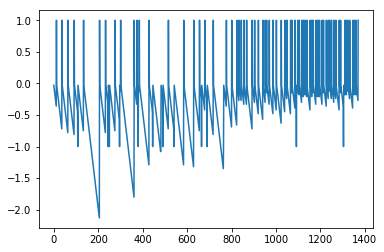

In [32]:
import matplotlib.pyplot as plt
plt.plot(Reward_list)
plt.show()

In [33]:
print(build_policy_table(q_table))

[['>' '>' '>' '^']
 ['v' '0' '^' '^']
 ['v' '<' '^' 'v']]


In [27]:
print(q_table)

           0         1         2         3
0   0.000258  0.000433  0.028289 -0.000059
1   0.004322  0.000174  0.145115  0.000000
2   0.034443  0.001658  0.534119  0.000000
3   0.000000  0.000000  0.000000  0.000000
4   0.003636 -0.000245 -0.000234 -0.000158
5   0.000000  0.000000  0.000000  0.000000
6   0.036374  0.000023 -0.049010  0.000000
7   0.000000  0.000000  0.000000  0.000000
8  -0.000198 -0.000427 -0.000429 -0.000421
9  -0.000207 -0.000246 -0.000162 -0.000188
10  0.001955 -0.000052 -0.000049 -0.000020
11 -0.039404 -0.000010 -0.000039 -0.000020
